In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('/content/spotify_history.csv')

In [62]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [63]:
# Check for missing values
print(df.isnull().sum())


spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [65]:
# Reason Start
reason_start = df['reason_start'].value_counts()
reasons_s = reason_start[reason_start > 1]
print(reasons_s)

reason_start
trackdone     76655
fwdbtn        53793
clickrow      11228
appload        3729
backbtn        2205
playbtn        1458
remote          477
trackerror      120
unknown          23
nextbtn          21
popup             5
endplay           2
Name: count, dtype: int64


In [66]:
# Reason End
reason_end = df['reason_end'].value_counts()
reasons_e = reason_end[reason_end > 1]
print(reasons_e)

reason_end
trackdone                       77194
fwdbtn                          53470
endplay                         10119
logout                           4367
backbtn                          2182
unexpected-exit-while-paused     1725
unknown                           268
remote                            224
unexpected-exit                   118
clickrow                           34
nextbtn                            21
appload                             7
popup                               6
reload                              4
trackerror                          4
Name: count, dtype: int64


In [67]:
# Fill missing values with 'Unknown'
df['reason_end'] = df['reason_end'].fillna('Unknown')

In [68]:
df.dtypes

,0
spotify_track_uri,object
ts,object
platform,object
ms_played,int64
track_name,object
artist_name,object
album_name,object
reason_start,object
reason_end,object
shuffle,bool


In [69]:
# Most streamed artists
artist_counts = df['artist_name'].value_counts()
print(artist_counts.head(10))

artist_name
The Beatles           13621
The Killers            6878
John Mayer             4855
Bob Dylan              3814
Paul McCartney         2697
Led Zeppelin           2482
Johnny Cash            2478
The Rolling Stones     2390
Radiohead              2305
The Black Keys         2231
Name: count, dtype: int64


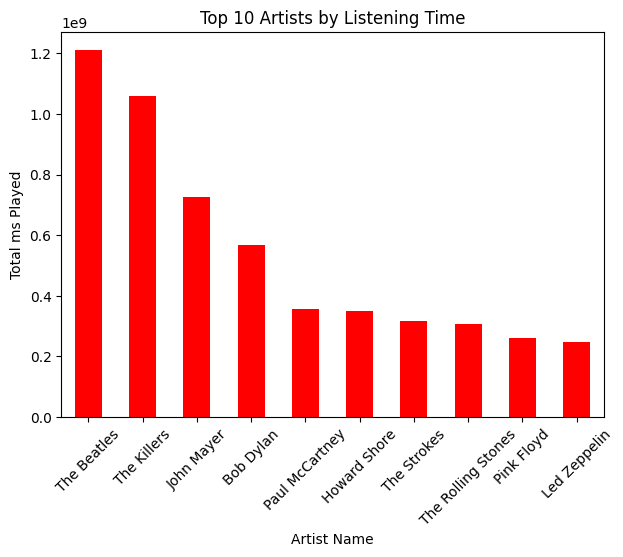

In [76]:
top_artists = df.groupby("artist_name")["ms_played"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(7, 5))
top_artists.plot(kind="bar", color="red")
plt.title("Top 10 Artists by Listening Time")
plt.xlabel("Artist Name")
plt.ylabel("Total ms Played")
plt.xticks(rotation=45)
plt.show()

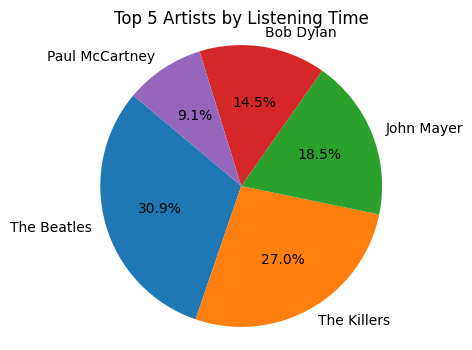

In [71]:
artist_playtime = df.groupby('artist_name')['ms_played'].sum()
top_5_artists = artist_playtime.sort_values(ascending=False).head(5)
plt.figure(figsize=(4, 4))
plt.pie(top_5_artists, labels=top_5_artists.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Artists by Listening Time")
plt.axis('equal')
plt.show()

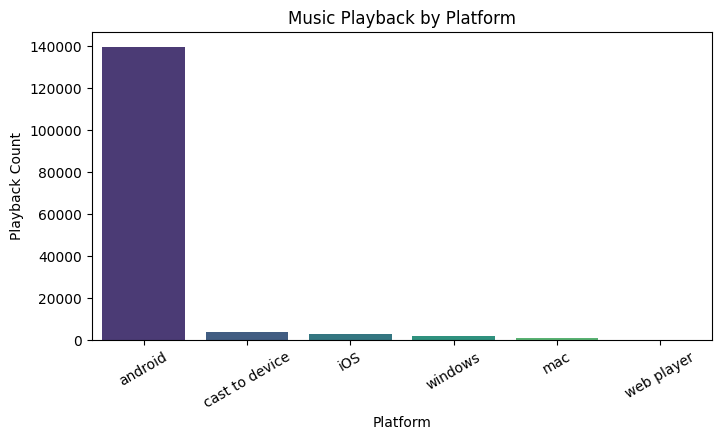

In [72]:
# Listening Behavior by Platform
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="platform", order=df['platform'].value_counts().index, palette="viridis")
plt.title("Music Playback by Platform")
plt.xlabel("Platform")
plt.ylabel("Playback Count")
plt.xticks(rotation=30)
plt.show()


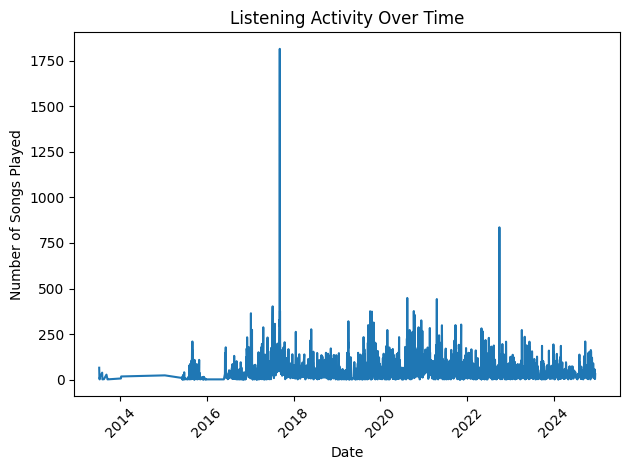

In [73]:
df['ts'] = pd.to_datetime(df['ts'])  # Make sure timestamp is in datetime format
daily_listens = df.groupby(df['ts'].dt.date).size()

plt.plot(daily_listens.index, daily_listens.values)
plt.title("Listening Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Songs Played")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

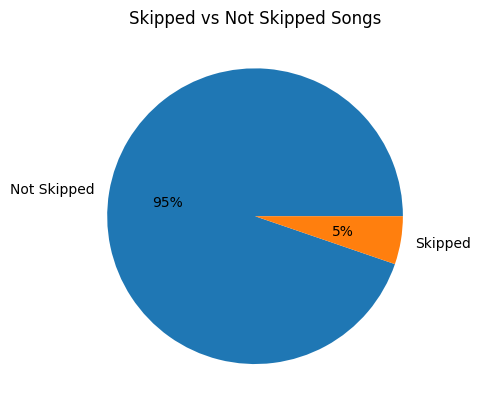

In [74]:
import matplotlib.pyplot as plt
skipped_counts = df['skipped'].value_counts()
labels = ['Not Skipped', 'Skipped']
plt.pie(skipped_counts, labels=labels, autopct='%1.0f%%')
plt.title("Skipped vs Not Skipped Songs")
plt.show()

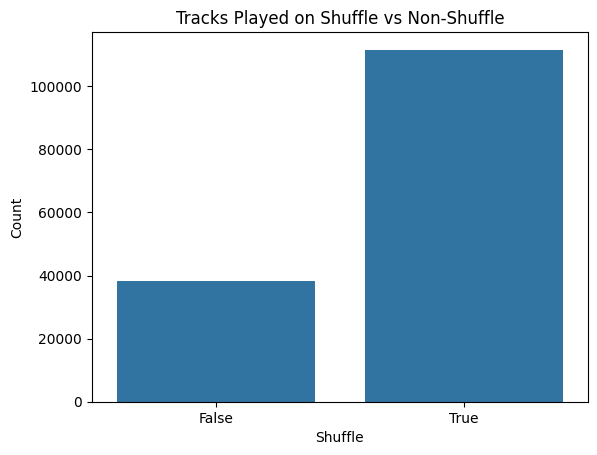

In [75]:
# Count of tracks played on shuffle vs non-shuffle
sns.countplot(x='shuffle', data=df)
plt.title('Tracks Played on Shuffle vs Non-Shuffle')
plt.xlabel('Shuffle')
plt.ylabel('Count')
plt.show()